# <center>Reinforcement Learning</center>
According to Wikipedia, Reinforcement learning (RL) is an area of machine learning concerned with how software agents should take actions in an environment so as to maximize some notion of cumulative reward. In recent years, we’ve seen a lot of improvements in this fascinating area of research. Examples include DeepMind and the Deep Q learning architecture in 2014, beating the champion of the game of Go with AlphaGo in 2016, OpenAI and the PPO in 2017, amongst others.

**APPLICATIONS**
<br>Traffic Light Control
<br>Manufacturing
<br>Robotics
<br>Inventory Management
<br>Games
<br>Finance
<br>Personalized Recommendations
<br>Resources management in computer clusters

**So, How Does Reinforcement Learning Work?**
<br>Reinforcement learning involves an agent, a set of states S, and a set A of actions per state. By performing an action a = A, the agent transitions from state to state. Executing an action in a specific state provides the agent with a reward (a numerical score).
<br>The goal of the agent is to maximize its total (future) reward. It does this by adding the maximum reward attainable from future states to the reward for achieving its current state, effectively influencing the current action by the potential future reward. This potential reward is a weighted sum of the expected values of the rewards of all future steps starting from the current state.
<br>As an example, imagine an agent is trying to pick up a pen, and it fails. It tries again, fails. After repeating this process 1000 times, it finally succeeds. The agent has now learned how to pick up a pen. This is Reinforcement Learning in a nutshell, it’s a lot like how living creatures learn.

There are 3 key terms in Reinforcement Learning.
- **State:** Describes the current situation.
- **Action:** What the agent can do in a particular situation
- **Reward:** Feedback for whether a particular action in a given state was good or bad. Serves as performance metrics for RL environments

<img src="mountain-car-v0.gif" width="400" align="center">

# <center>MountainCar-v0</center>
Mountain car is on a one-dimensional track, positioned between two "mountains". The goal is to drive up the mountain on the right; however, the car's engine is not strong enough to scale the mountain in a single pass. Therefore, the only way to succeed is to drive back and forth to build up momentum.
This is a classic reinforcement learning problem where the objective is to create an algorithm which learns to climb a steep hill to reach the goal marked by a flag. 

**Reward**
- -1 for each time step, until the goal position of 0.5 is reached. There is no penalty for climbing the left hill, which upon reached acts as a wall.

**Starting State**
- Random position from -0.6 to -0.4 with no velocity.

**Episode Termination**
- The episode ends when you reach 0.5 position, or if 200 iterations are reached.

### Import all the libraries

In [2]:
import numpy as np
import gym
import pandas as pd
import random
import matplotlib.pyplot as plt
import time

In [3]:
env = gym.make("MountainCar-v0")


C:\Users\Win10\Anaconda3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


## Reset Environment
Resetting the environment will start the car from any random position between -0.6 and -0.4 with no velocity

In [4]:
env.reset()

array([-0.53257325,  0.        ])

In [5]:
%%html
<style>
    table {float:left}
</style>
<!Comment: to shift below table in markdown cell to left>


### Action space
Like every other Reinforcement Learning environments, MountainCar also has action space. To be precise, it has 3 discrete actions: push left, push right, no push. By default, these 3 actions are represented by integers: 0, 1 and 2.

Type: Discrete(3)


| Num |	Action   |
|:----|:----------|
|0	  |push left |
|1	  |no push   |
|2	  |push right|

In [6]:
action_space = env.action_space.n
print("Total action count: ", action_space)
print("Type of action space: ", env.action_space)

Total action count:  3
Type of action space:  Discrete(3)


### Observation Space
All Reinforcement Learning environments have a state space/observation space i.e.; the set of all possible states of the environment where the agent can be at a given instant. Mountain car state space represents a 2-dimensional box, where each state observation is a vector of 2 (float) values - position and velocity. The state space is continuous value, where the first element of the state vector -> position, can take any value ranging from -1.2 to 0.6 and the second element -> velocity, can take any value ranging from -0.07 to 0.07

Type: Box(2)

|Num	|Observation	|Min	|Max
|-|-|-|-|
|0	|position	|-1.2	|0.6
|1	|velocity	|-0.07	|0.07

In [7]:
observation_space = env.observation_space
print("Observation space: ", observation_space)

observation_space_high = env.observation_space.high
print("Max values of observation space: ", observation_space_high)

observation_space_low = env.observation_space.low
print("Min values of observation space: ", observation_space_low)

Observation space:  Box(2,)
Max values of observation space:  [0.6  0.07]
Min values of observation space:  [-1.2  -0.07]


### Q-table
This environment has continuous state space, which means that there are infinitely many state-action pairs. Hence, the Q-table will be of infinite dimension.
<br>One way to address this problem is to use deep Q-networks (DQNs). DQNs combine deep learning with Q-learning by using a deep neural network as an approximator for the Q-function. DQNs have been successfully applied to developing artificial intelligence capable of playing Atari video games.
<br>However, for a problem as simple as the Mountain Car problem, this may be a bit of overkill.
<br>An alternative approach is to just discretize the state space. One simple way in which this can be done is to round the first element of the state vector to the nearest 0.1 and the second element to the nearest 0.01, and then (for convenience) multiply the first element by 10 and the second by 100.
This reduces the number of state-action pairs down to 855, which now makes it possible to satisfy the condition required for Q-learning to converge.

In [12]:
## determine the size of discretized state space

num_states = (env.observation_space.high - env.observation_space.low) * np.array([10,100])
print(num_states)
num_states = np.round(num_states, 0).astype(int) + 1
print(num_states)

Qtable = np.zeros((num_states[0], num_states[1], env.action_space.n))  
print(Qtable.shape, "\n", Qtable[:1])
    
    

[18.00000072 14.00000006]
[19 15]
(19, 15, 3) 
 [[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


### Q-Learning 
<br>Q-learning is a model-free reinforcement learning algorithm. The goal of Q-learning is to learn a policy, which tells an agent what action to take under what circumstances. It does not require a model (hence the connotation "model-free") of the environment, and it can handle problems with stochastic transitions and rewards, without requiring adaptations.

For any finite Markov decision process (FMDP), Q-learning finds a policy that is optimal in the sense that it maximizes the expected value of the total reward over any and all successive steps, starting from the current state. Q-learning can identify an optimal action-selection policy for any given FMDP, given infinite exploration time and a partly-random policy. "Q" names the function that returns the reward used to provide the reinforcement and can be said to stand for the "quality" of an action taken in a given state.

The algorithm is as follows:
1. Initialize Q(s1, s2, a) by setting all of the elements in Q-table to zero;
2. Observe the current state, (s1, s2);
3. Based on the exploration strategy, choose an action to take - a;
4. Take action a and observe the resulting reward, r, and the new state of the environment, (s1’, s2’);
5. Update Q(s1, s2, a) based on the update rule:
<br>Q’(s1, s2, a) = (1 — w)*Q(s1, s2, a) + w*(r+d*Q(s1’, s2’, argmax a’ Q(s1’, s2’, a’)))
<br>Where w is the learning rate and d is the discount rate;
6. Repeat steps 2–5 until convergence.

The core of this algorithm is the Bellman equation:
<img src="bellman_equation.png" width="800" align="left"><br><br><br><br>
<br>
<br><br>
<br>
<br>**Learning Rate**
<br>The learning rate or step size determines to what extent newly acquired information overrides old information. A factor of 0 makes the agent learn nothing (exclusively exploiting prior knowledge), while a factor of 1 makes the agent consider only the most recent information (ignoring prior knowledge to explore possibilities). In fully deterministic environments, a learning rate of value equal to 1 is optimal. When the problem is stochastic, the algorithm converges under some technical conditions on the learning rate that require it to decrease to zero. In practice, often a constant learning rate is used, such as learning rate = 0.1 for all t.

<br>**Discount factor**
<br>The discount factor, gamma,  determines the importance of future rewards. A factor of 0 will make the agent "myopic" (or short-sighted) by only considering current rewards, while a factor approaching 1 will make it strive for a long-term high reward. If the discount factor meets or exceeds 1, the action values may diverge. For gamma = 1, without a terminal state, or if the agent never reaches one, all environment histories become infinitely long, and utilities with additive, undiscounted rewards generally become infinite. Even with a discount factor only slightly lower than 1, Q-function learning leads to propagation of errors and instabilities when the value function is approximated with an artificial neural network. In that case, starting with a lower discount factor and increasing it towards its final value accelerates learning.

<br>**Initial conditions (Q0)**
<br>Since Q-learning is an iterative algorithm, it implicitly assumes an initial condition before the first update occurs. High initial values, also known as "optimistic initial conditions", can encourage exploration: no matter what action is selected, the update rule will cause it to have lower values than the other alternative, thus increasing their choice probability. The first reward r can be used to reset the initial conditions. According to this idea, the first time an action is taken the reward is used to set the value of Q. This allows immediate learning in case of fixed deterministic rewards. A model that incorporates reset of initial conditions (RIC) is expected to predict participants' behavior better than a model that assumes any arbitrary initial condition (AIC). RIC seems to be consistent with human behaviour in repeated binary choice experiments

**Expected lifetime value**
<br>RL agents learn to maximize cumulative future reward.
<br><img src="Rewards.jpg" width="400" align="center">
<br>If we let this series go on to infinity, then we might end up with infinite return, which really doesn’t make a lot of sense for our definition of the problem. Therefore, this equation only makes sense if we expect the series of rewards to end. More common than using future cumulative reward as return is using future cumulative discounted reward:
<br><img src="Rewards1.jpg" width="400" align="center">

## Baseline model

In [17]:
## Baseline parameters

num_episodes = 5000
total_test_episode = 100
max_steps_per_episode = 99

learning_rate = 0.7
discount_rate = 0.8

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.01

In [10]:
total_rewards = []

for episode in range(num_episodes):
    state = env.reset()

    done = False
    rewards_current_episode = 0

    # Discretize state
    state_adj = (state - env.observation_space.low)*np.array([10, 100])
    state_adj = np.round(state_adj, 0).astype(int)

    for step in range(max_steps_per_episode):

        if episode >= (num_episodes -10):
            env.render()

        ## exploration-exploitation tradeoff
        epsilon_threshold = random.uniform(0,1)
        if epsilon_threshold > exploration_rate:
            action = np.argmax(Qtable[state_adj[0], state_adj[1], :])
        else:
            action = env.action_space.sample()

        new_state, rewards, done, info = env.step(action)

        # Discretize state2
        state2_adj = (new_state - env.observation_space.low)*np.array([10, 100])
        state2_adj = np.round(state2_adj, 0).astype(int)

        ## update Q table
        Qtable[state_adj[0], state_adj[1], action] = Qtable[state_adj[0], state_adj[1], action] * (1 - learning_rate) + \
        learning_rate * (rewards + discount_rate * np.max(Qtable[state2_adj[0], state2_adj[1]]))

        ## update variables
        rewards_current_episode += rewards
        state_adj = state2_adj

        if done == True:
            print("Reached mountain top: Goal achieved")
            break

    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)
    total_rewards.append(rewards_current_episode)
    
    
env.close()
rewards_per_thousand_episodes = np.split(np.array(total_rewards), num_episodes/1000)
count = 1000
for r in rewards_per_thousand_episodes:
    print(count,": ", sum(r)/1000)
    count +=1000




1000 :  -99.0
2000 :  -99.0
3000 :  -99.0
4000 :  -99.0
5000 :  -99.0


Text(0.5, 1.0, 'Episodes vd Rewards')

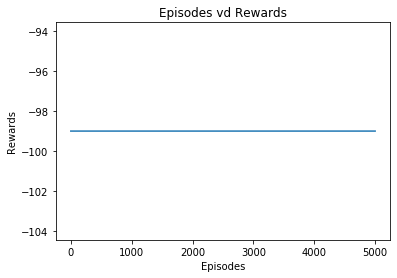

In [18]:
plt.plot(range(num_episodes), total_rewards)
plt.xlabel("Episodes")
plt.ylabel("Rewards")
plt.title("Episodes vs Rewards")

The base line model didn't achieve its goal as the average reward is -99 which means for each episodes it went on for total specified number of steps i.e.; 99 and not even once reached its goal, which is the top of the mountain (position = 0.5)
We need to try different values of paramters (learning rate, discount rate, epsilon, epsilon decay rate) to optimize the model so that it eventually learns to reach its goal.

## Optimized model

In [ ]:
## Define Q-learning function

def QLearning(env, learningRate, discount, epsilon, max_exploration_rate, min_exploration_rate, exploration_decay_rate, episodes):
       
    # Initialize variables to track rewards
    reward_list = []
    ave_reward_list = []
    
        
    ##initialize Qtable
    Q = np.zeros((num_states[0], num_states[1], env.action_space.n)) 
    #Qtable = np.random.uniform(low = -1, high = 1, size = (num_states[0], num_states[1], env.action_space.n))
    
    for i in range(episodes):
        
        # initialize parameters
        done = False
        tot_reward, reward = 0,0
        state = env.reset()
        
        # Discretize state
        state_adj = (state - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
        
        while done != True:
            # Render environment for last ten episodes
            if i >= (episodes - 20):
                env.render()
                
            # Determine next action - epsilon greedy strategy
            if np.random.random() > epsilon:
                action = np.argmax(Qtable[state_adj[0], state_adj[1]]) 
            else:
                action = np.random.randint(0, env.action_space.n)
                
            # Get next state and reward
            state2, reward, done, info = env.step(action) 
            
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            #Allow for terminal states
            if done and state2[0] >= 0.5:
                Qtable[state_adj[0], state_adj[1], action] = reward
                #print("Reached GOAL!!",reward)
                #time.sleep(2)
                break
                
            # Adjust Q value for current state
            else:
                Qtable[state_adj[0], state_adj[1], action] = Qtable[state_adj[0], state_adj[1], action] * (1 - learningRate) + \
        learningRate * (reward + discount * np.max(Qtable[state2_adj[0], state2_adj[1]]))
                                     
            # Update variables
            tot_reward += reward
            state_adj = state2_adj
            
        epsilon = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episodes)
        
        
        # Track rewards
        reward_list.append(tot_reward)
                
    env.close()
    
    return (np.mean(reward_list))
    
    
#rewards = QLearning(env, learning_rate, discount_rate, epsilon, 0, num_episodes) 
    
    

In [ ]:
num_episodes = 10000
max_steps_per_episode = 200

learning_rate = [0.3,0.5,0.9]
discount_rate = [0.7,0.8,0.9]

exploration_rate = [0.9, 1]
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = [0.01, 0.001]

df = pd.DataFrame(columns=["Learning Rate", "Discount Rate", "Epsilon", "Epsilon Decay Rate", "Rewards"])

for lr in learning_rate:
    for dr in discount_rate:
        for epsi in exploration_rate:
            for edr in exploration_decay_rate:
                rewards = QLearning(env, lr, dr, epsi, max_exploration_rate, min_exploration_rate, edr, num_episodes) 
                df = df.append({"Learning Rate": lr, "Discount Rate":dr, "Epsilon":epsi, "Epsilon Decay Rate":edr, "Rewards":rewards}, ignore_index=True)
                print("{} {} {} {} {}".format(lr, dr, epsi, edr, rewards))
    

0.3 0.7 0.9 0.01 -200.0
0.3 0.7 0.9 0.001 -200.0
0.3 0.7 1 0.01 -200.0
0.3 0.7 1 0.001 -200.0
0.3 0.8 0.9 0.01 -187.3095
0.3 0.8 0.9 0.001 -190.5003
0.3 0.8 1 0.01 -188.5596
0.3 0.8 1 0.001 -189.9571
0.3 0.9 0.9 0.01 -183.1428
0.3 0.9 0.9 0.001 -180.7016
0.3 0.9 1 0.01 -185.5995
0.3 0.9 1 0.001 -184.7382
0.5 0.7 0.9 0.01 -199.5697
0.5 0.7 0.9 0.001 -199.9935
0.5 0.7 1 0.01 -199.976
0.5 0.7 1 0.001 -199.9833
0.5 0.8 0.9 0.01 -197.176
0.5 0.8 0.9 0.001 -200.0
0.5 0.8 1 0.01 -200.0
0.5 0.8 1 0.001 -200.0
0.5 0.9 0.9 0.01 -192.2735
0.5 0.9 0.9 0.001 -193.3227
0.5 0.9 1 0.01 -191.7202
0.5 0.9 1 0.001 -194.235
0.9 0.7 0.9 0.01 -199.9984
0.9 0.7 0.9 0.001 -200.0
0.9 0.7 1 0.01 -200.0
0.9 0.7 1 0.001 -200.0
0.9 0.8 0.9 0.01 -199.9978
0.9 0.8 0.9 0.001 -200.0
0.9 0.8 1 0.01 -200.0
0.9 0.8 1 0.001 -200.0
0.9 0.9 0.9 0.01 -198.3096
0.9 0.9 0.9 0.001 -198.7666
0.9 0.9 1 0.01 -198.7205
0.9 0.9 1 0.001 -198.0296


We chose different paramter values and tried them against our model. We have considered the generated reward by the model as our performace evaluation metric. 
After executing above function we found that hyperparamters for our optimized model:
- **Learning Rate:** 0.3
- **Discount Rate:** 0.9
- **Epsilon:** 0.9
- **Epsilon Decay Rate:** 0.001

Episode 1000 Average Reward: -184.729
Episode 2000 Average Reward: -172.624
Episode 3000 Average Reward: -166.269
Episode 4000 Average Reward: -177.342
Episode 5000 Average Reward: -158.644
Episode 6000 Average Reward: -165.551
Episode 7000 Average Reward: -177.381
***** Reached GOAL *****
***** Reached GOAL *****
***** Reached GOAL *****
***** Reached GOAL *****
***** Reached GOAL *****
***** Reached GOAL *****
Episode 8000 Average Reward: -160.205

Average number of steps taken per episode:  170.343125

Epsilon value:  0.010332108001623487


-170.343125

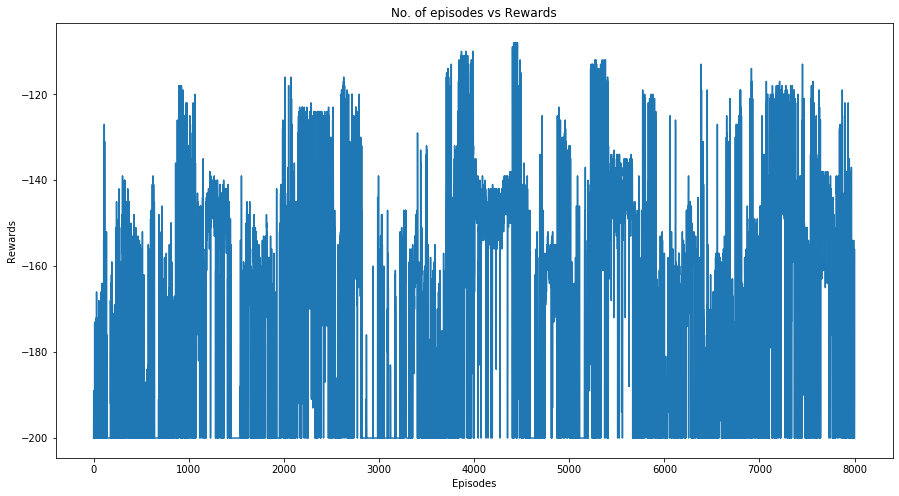

In [29]:
## Define Q-learning function

def QLearning(env, learningRate, discount, epsilon, max_exploration_rate, min_exploration_rate, exploration_decay_rate, episodes):
       
    # Initialize variables to track rewards
    reward_list = []
    reward_list1 = []
    ave_reward_list = []
    epsilon_list = []
    
    # Initialize variable to track number of steps
    total_steps = []
    
    ##initialize Qtable
    Q = np.zeros((num_states[0], num_states[1], env.action_space.n)) 
    
    for i in range(episodes):
        
        # initialize parameters
        done = False
        tot_reward, reward = 0,0
        state = env.reset()
        epsilon_list.append(epsilon)
        
        # Discretize state
        state_adj = (state - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
        
        # initialize steps
        steps = 0
        
        while done != True:
            # Render environment for last ten episodes
            if i >= (episodes - 10):
                env.render()
                                
            # Determine next action - epsilon greedy strategy
            if np.random.random() > epsilon:
                action = np.argmax(Qtable[state_adj[0], state_adj[1]]) 
            else:
                action = np.random.randint(0, env.action_space.n)
                
            # Get next state and reward
            state2, reward, done, info = env.step(action) 
            
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            if i >= (episodes - 10) and done == True and state2[0] >= 0.5:
                print("***** Reached GOAL *****")
                time.sleep(2)
            
            #Allow for terminal states
            if done and state2[0] >= 0.5:
                Qtable[state_adj[0], state_adj[1], action] = reward
                break
                
            # Adjust Q value for current state
            else:
                Qtable[state_adj[0], state_adj[1], action] = Qtable[state_adj[0], state_adj[1], action] * (1 - learningRate) + \
        learningRate * (reward + discount * np.max(Qtable[state2_adj[0], state2_adj[1]]))
              
           # Update variables
            tot_reward += reward
            state_adj = state2_adj
            steps += 1
            
        # Decay epsilon
        epsilon = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episodes)
        
        # Track rewards
        reward_list.append(tot_reward)
        reward_list1.append(tot_reward)
        
        # Tracks number of steps
        total_steps.append(steps)
        
        if (i+1) % 1000 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
            
        if (i+1) % 1000 == 0:    
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
    
    # Print average steps per episode
    print("\nAverage number of steps taken per episode: ", np.mean(total_steps))
    
    # Print of epsilon at the end of the episode
    print("\nEpsilon value: ", epsilon)
    
    env.close()
    
    # Plot number of episodes vs rewards
    plt.figure(figsize=(15,8))
    plt.plot(np.arange(episodes), reward_list1)
    plt.xlabel("Episodes")
    plt.ylabel("Rewards")
    plt.title("No. of episodes vs Rewards")
    
    return np.mean(ave_reward_list)
    
    
rewards = QLearning(env, 0.3, 0.99, 0.98, 1, 0.01, 0.001, 8000) 
rewards
    
    

After running optimized model against hyperparameters, we found significant improvement in the reward generated. This model has successfully achieved its goal as the average reward per thousand episodes and the average reward of total episodes are less than -200.

## Trying different policy other than argmax(Q(s,a))

In [24]:
## Define Q-learning function

def QLearning(env, learningRate, discount, epsilon, max_exploration_rate, min_exploration_rate, exploration_decay_rate, episodes):
       
    # Initialize variables to track rewards
    reward_list = []
    ave_reward_list = []
    
    # Initialize variable to track number of steps
    total_steps = []
    
        
    ##initialize Qtable
    Q = np.zeros((num_states[0], num_states[1], env.action_space.n)) 
    
    for i in range(episodes):
        
        # initialize parameters
        done = False
        tot_reward, reward = 0,0
        state = env.reset()
        
        # Discretize state
        state_adj = (state - env.observation_space.low)*np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
        
        # initialize steps
        steps = 0
        
        while done != True:
            # Render environment for last ten episodes
            if i >= (episodes - 10):
                env.render()
                                
            # Determine next action - epsilon greedy strategy
            if np.random.random() > epsilon:
                ## Trying minimum argument policy
                #action = np.argmin(Qtable[state_adj[0], state_adj[1]]) 
                ## trying random choice policy
                action = random.choice(list(enumerate(Qtable[state_adj[0], state_adj[1]])))[0]
            else:
                action = np.random.randint(0, env.action_space.n)
                
            # Get next state and reward
            state2, reward, done, info = env.step(action) 
            
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            if i >= (episodes - 10) and done == True and state2[0] >= 0.5:
                env.render()
                print("***** Reached GOAL *****")
                time.sleep(2)
            
            #Allow for terminal states
            if done and state2[0] >= 0.5:
                Qtable[state_adj[0], state_adj[1], action] = reward
                break
                
            # Adjust Q value for current state
            else:
                Qtable[state_adj[0], state_adj[1], action] = Qtable[state_adj[0], state_adj[1], action] * (1 - learningRate) + \
        learningRate * (reward + discount * np.max(Qtable[state2_adj[0], state2_adj[1]]))
              
           # Update variables
            tot_reward += reward
            state_adj = state2_adj
            steps += 1
            
        # Decay epsilon
        epsilon = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episodes)
        
        # Track rewards
        reward_list.append(tot_reward)
        
        # Tracks number of steps
        total_steps.append(steps)
        
        if (i+1) % 1000 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
            
        if (i+1) % 1000 == 0:    
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
    print(np.mean(total_steps))
        
        
    env.close()
    
    
    return np.mean(ave_reward_list)
    
    
rewards = QLearning(env, 0.3, 0.95, 0.95, 1, 0.01, 0.001, 10000) 
rewards
    
    

Episode 1000 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 3000 Average Reward: -200.0
Episode 4000 Average Reward: -200.0
Episode 5000 Average Reward: -200.0
Episode 6000 Average Reward: -200.0
Episode 7000 Average Reward: -200.0
Episode 8000 Average Reward: -200.0
Episode 9000 Average Reward: -200.0
Episode 10000 Average Reward: -200.0
200.0


-200.0

We tried 2 different policies - argmin and random choice. Results of both of these policies are similar to that of the baseline model as both of them were unable to improve the reward generated by the model.

Q-Learning uses value-based iteration since its constantly trying to improve the value function at each iteration until the it reaches its goal.

**Value Iteration**
Value-based iteration computes the optimal state value function by iteratively improving the estimate of  value function v(s) which represent how good is a state for an agent to be in. It is equal to expected total reward for an agent starting from state s. The value function depends on the policy by which the agent picks actions to perform. 

**Policy Iteration**
While value-iteration algorithm keeps improving the value function at each iteration until the value-function converges. Since the agent only cares about the finding the optimal policy, sometimes the optimal policy will converge before the value function. Therefore, another algorithm called policy-iteration instead of repeated improving the value-function estimate, it will re-define the policy at each step and compute the value according to this new policy until the policy converges. Policy iteration is also guaranteed to converge to the optimal policy and it often takes less iterations to converge than the value-iteration algorithm.

## Conclusion

We trained the Q-Learning model against our baseline parameters and found that the agent was not able to reach its goal for any of the episode.
We then tried to optimize our model by training it against different parameter values and found optimal hyperparameters. We trained the model against new hyperparameters and found that the model performance improved significantly as comapred to the baseline model. The agent was able to reach its goal and was able to achieve the average reward close to -160.

## Citations:
In order to finish this project, I took help from below sources:
- https://en.wikipedia.org/wiki/Q-learning
- https://medium.com/@m.alzantot/deep-reinforcement-learning-demysitifed-episode-2-policy-iteration-value-iteration-and-q-978f9e89ddaa
- https://towardsdatascience.com/getting-started-with-reinforcement-learning-and-open-ai-gym-c289aca874f

#  Copyright 2020 Sachin

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.